<a href="https://colab.research.google.com/github/jlaurant/j/blob/master/PetAdoption_rv1009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBA 6211 Project

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from matplotlib.pyplot import figure

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

# Show figures in notebook
%matplotlib inline
plt.style.use('ggplot')

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Import the data

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# import the training set
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')

# Check the data

In [6]:
# check the columns of the training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [7]:
# check the first 5 rows of the training set
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


# Data Visualization

In [0]:
df['Type'] = df['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female' if x == 2 else 'Mixed')

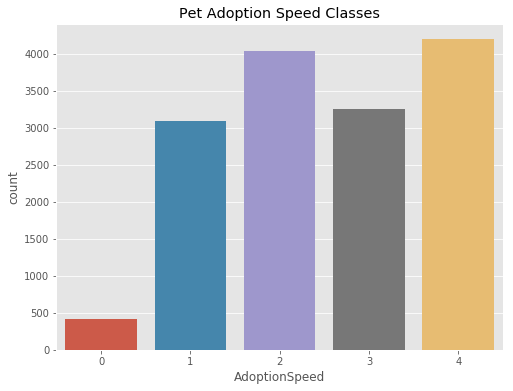

In [0]:
plt.figure(figsize=(8, 6));
sns.countplot(x='AdoptionSpeed',data=df)
plt.title('Pet Adoption Speed Classes');

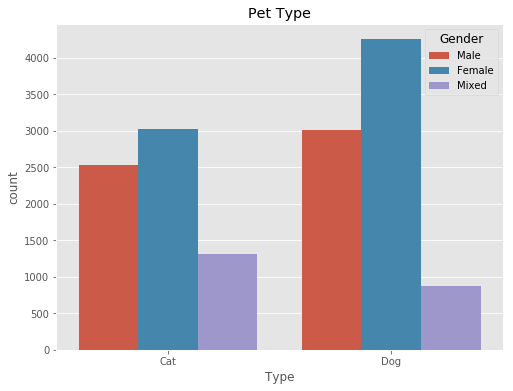

In [0]:
plt.figure(figsize=(8, 6));
sns.countplot(hue='Gender', x='Type',data=df)
plt.title('Pet Type');

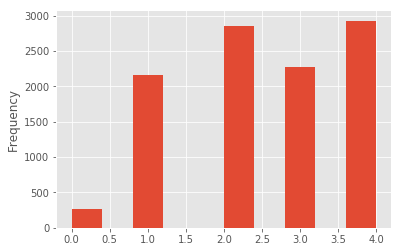

In [0]:
#checking the dist. of outcome variable
y_train.plot('hist')

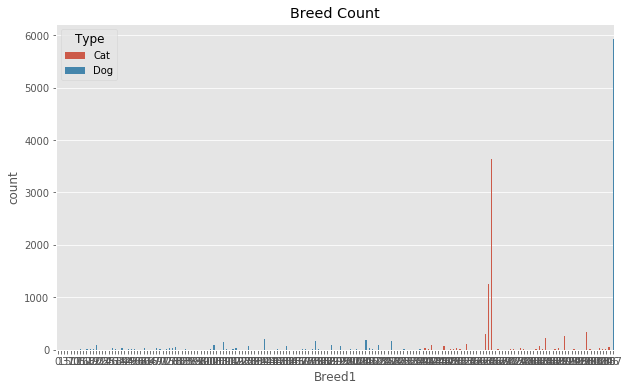

In [0]:
plt.figure(figsize=(10, 6));
sns.countplot(hue='Type', x='Breed1',data=df)
plt.title('Breed Count');

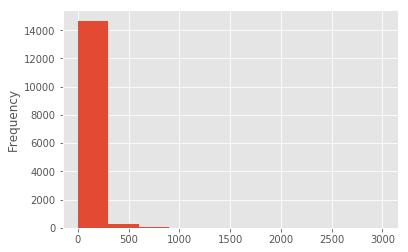

In [0]:
df.Fee.plot('hist')

# Group Breeds

There are too many breed categories. Let's group some of the smaller categories.

In [0]:
df.loc[df['Type'] == 2].Breed1.value_counts().head(10)

266    3634
265    1258
299     342
264     296
292     264
285     221
254     105
243      94
283      73
247      71
Name: Breed1, dtype: int64

In [0]:
df.loc[df['Type'] == 1].Breed1.value_counts().head(10)

307    5923
141     205
205     189
179     167
218     161
109     151
103      98
20       90
213      89
189      88
Name: Breed1, dtype: int64

In [0]:
# create a function to change the uncommon breeds (count < 200) into '999'
def Breed1(df): 
    
    if df.Breed1 not in [266,265,299,264,292,285,307,141]:
        df.Breed1= 999
    else:
        df.Breed1 = df.Breed1
    return df
  
df=df.apply(Breed1, axis=1)

In [0]:
# check the results
df.Breed1.value_counts()

307    5927
266    3634
999    2846
265    1258
299     342
264     296
292     264
285     221
141     205
Name: Breed1, dtype: int64

In [0]:
df.loc[df['Type'] == 2].Breed2.value_counts().head(10)

0      5135
266     599
265     321
299     138
264     125
292     105
285      78
254      42
247      39
243      30
Name: Breed2, dtype: int64

In [0]:
df.loc[df['Type'] == 1].Breed2.value_counts().head(10)

0      5627
307    1727
218      90
141      86
103      55
213      49
189      40
109      39
179      38
205      32
Name: Breed2, dtype: int64

In [0]:
# create a function to change the uncommon breeds into 'others'
def Breed2(df): 
    
    if df.Breed2 not in [0,266,265,307]:
        df.Breed2= 999
    else:
        df.Breed2 = df.Breed2
    return df
  
df=df.apply(Breed2, axis=1)

In [0]:
# check the results
df.Breed2.value_counts()

0      10762
307     1727
999     1584
266      599
265      321
Name: Breed2, dtype: int64

In [0]:
def names(df):
  if pd.notnull(df.Name) == True:
    df.Name = 1
  else:
    df.Name=0
  return df

df=df.apply(names, axis=1)

In [0]:
def adopted(df):
  if df.AdoptionSpeed not in [0,1,2,3]:
        df.AdoptionSpeed= 0
  else:
        df.AdoptionSpeed = 1
  return df

df=df.apply(adopted, axis=1)

In [0]:
def state(df):
  if df.State not in [41326, 41401]:
        df.State= 11111
  else:
        df.State = df.State
  return df

df=df.apply(state, axis=1)

# Data processing

In [0]:
# drop the columns we do not need
df = df.drop(['RescuerID','Description','PetID'], axis=1)

In [17]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [18]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,1
1,2,1,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,1
2,1,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,1
3,1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,1
4,1,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,1


In [19]:
df[['Fee','Age','VideoAmt','PhotoAmt','Quantity']].describe()

,Fee,Age,VideoAmt,PhotoAmt,Quantity
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,21.259988,10.452078,0.056760,3.889215,1.576069
std,78.414548,18.155790,0.346185,3.487810,1.472477
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,1.000000
50%,0.000000,3.000000,0.000000,3.000000,1.000000
75%,0.000000,12.000000,0.000000,5.000000,1.000000
max,3000.000000,255.000000,8.000000,30.000000,20.000000


In [146]:
df.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [0]:
X=df.drop(['AdoptionSpeed','Fee','Age','VideoAmt','PhotoAmt','Quantity'],axis=1)
y=df.AdoptionSpeed

In [0]:
X.dtypes

Type            int64
Breed1          int64
Breed2          int64
Gender          int64
Color1          int64
Color2          int64
Color3          int64
MaturitySize    int64
FurLength       int64
Vaccinated      int64
Dewormed        int64
Sterilized      int64
Health          int64
State           int64
dtype: object

In [0]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
X_cat=enc.fit_transform(X).toarray()

In [135]:
X_cat[0,:]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [139]:
X_cat.shape

(14993, 74)

In [137]:
enc.inverse_transform(X_cat[0,:].reshape(1,-1))

array([[    2,     1,   299,     0,     1,     1,     7,     0,     1,
            1,     2,     2,     2,     1, 41326]])

columns after recoding:
dog, cat, noName, withName, breed1(9 colums), breed2(5 columns),male, female, mixed, color1(7 columns), color2(7 columns), color3(6 columns), Small, Medium, Large, Extra Large, short, medium, long, vaccinated, not, dewormed, not, sterilized, not, Healthy, Minor Injury, Serious Injury, state(7), age, quantity, fee, videoamt, photoamt


In [22]:
df2  = df[['Age','Quantity','Fee','VideoAmt','PhotoAmt']].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X=np.concatenate([X_cat, df2], axis=1)

In [0]:
from sklearn.preprocessing import MaxAbsScaler 
scaler = MaxAbsScaler()
X=scaler.fit_transform(X)

In [25]:
X.shape

(14993, 79)

In [26]:
y.array.shape

(14993,)

In [0]:
from scipy import stats
stats.describe(X)

In [0]:
# Get training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

# Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100,  random_state=42)
rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [34]:
print('AUC for the current model is', roc_auc_score(y_test, rfr.predict(X_test)))

AUC for the current model is 0.6270826625296373


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print('AUC for the current model is', roc_auc_score(y_test, lr.predict(X_test)))

AUC for the current model is 0.5940952199748266


In [134]:
lr.coef_

array([[ 6.86711346e-01, -5.21981415e-01, -3.26792735e-02,
         1.97409204e-01, -6.33881577e-02,  2.96304977e-01,
         1.92139536e-01,  7.59355178e-05,  6.12731792e-01,
         5.00103191e-01, -1.44189548e-02, -1.36271699e+00,
         3.89860194e-03,  4.79089875e-02,  1.24380513e-01,
         1.72548613e-01, -3.13069629e-01,  1.32961445e-01,
         1.21074265e-01, -3.15543730e-02,  7.52100385e-02,
        -9.27485016e-02, -8.73323295e-02,  3.69523952e-02,
        -2.17804650e-01,  2.63305294e-01,  6.42896133e-02,
         1.98068109e-01, -1.24340794e-01,  1.70939324e-01,
         2.67100393e-02, -1.36018908e-01,  5.78402336e-02,
         1.42220981e-01,  2.73790547e-02,  1.83113712e-01,
        -3.92894584e-01, -1.51394985e-01,  2.00843346e-01,
         1.80936798e-01,  1.44125644e-01, -1.78238931e-01,
        -1.92035629e-01, -2.28614652e-01,  7.63619143e-01,
        -1.66520185e-01, -1.07388027e-01,  4.38638143e-01,
        -1.17908317e-01,  1.96821892e-01,  8.58163556e-0

The last five coefficients are for variables [age, quantity, fee, videoAmt, photoAmt]. The coefficient for photoAmt is large and positive, and that means more photo can lead to adoption, same for video amount.

# Neural Network

In [0]:
from keras.layers import *
from keras.models import Sequential

In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [0]:
# the following code is from 
# https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [89]:
ncol=X_train.shape[1]
act='selu'
num=30
nn1 = Sequential()
nn1.add(Dense(num,activation=act, input_shape = (ncol,)))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dense(1, activation='sigmoid')) 
nn1.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auc])
nn1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 30)                2400      
_________________________________________________________________
dropout_33 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_34 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 31        
Total params: 4,291
Trainable params: 4,291
Non-trainable params: 0
___________________________________________________

In [0]:
history=nn1.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=50,
                    validation_data=(X_test, y_test))

Text(0.5, 1.0, 'Training and test AUC')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

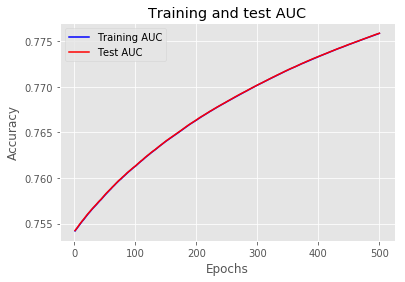

In [94]:
# get the learning curve
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1, len(loss) + 1);
plt.plot(epochs, loss, 'b', label='Training AUC')
plt.plot(epochs, val_loss, 'r', label='Test AUC')
plt.title('Training and test AUC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# XGBoost

In [0]:
from xgboost.sklearn import XGBClassifier 
# fit model to training data
xgb_model = XGBClassifier().fit(X_train, y_train)

In [44]:
print('AUC score for the current model is', roc_auc_score(y_test, xgb_model.predict(X_test)))

AUC score for the current model is 0.6217898994038384


In [45]:
confusion_matrix(y_test, xgb_model.predict(X_test),labels=[0,1])

array([[ 390,  880],
       [ 205, 3023]])

In [46]:
y_test.value_counts()

1    3228
0    1270
Name: AdoptionSpeed, dtype: int64

# text analysis

In [0]:
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')
text_data = df.Description

In [0]:
text_data.head(20)

0     Nibble is a 3+ month old ball of cuteness. He ...
1     I just found it alone yesterday near my apartm...
2     Their pregnant mother was dumped by her irresp...
3     Good guard dog, very alert, active, obedience ...
4     This handsome yet cute boy is up for adoption....
5     This is a stray kitten that came to my house. ...
6     anyone within the area of ipoh or taiping who ...
7     Siu Pak just give birth on 13/6/10 to 6puppies...
8     healthy and active, feisty kitten found in nei...
9     Very manja and gentle stray cat found, we woul...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
12    Peanut was an abused puppy until he was rescue...
13    Hi Pet Lovers! This is my first posting and I ...
14    Lost Dog Found (Bandar Menjalara, Kepong／Taman...
15    We moved out of our apartment to a landed home...
16              to be spayed on /12 adorable & friendly
17    shes active... she can obey wht command th

In [119]:
text=text_data.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
clean_text=[]
for line in text:
  clean_text.append(str(line))

In [0]:
#!pip install langdetect
lang=[]
for line in text_data:
  lang.append(detect(str(line)))

In [0]:
lang.count('en')

14176

In [121]:
# preprocessing text data
from keras.preprocessing.text import Tokenizer
# tokenize the most often 150 words
tokenizer = Tokenizer(num_words=150)
tokenizer.fit_on_texts(clean_text)
word_index = tokenizer.word_index
# convert descriptions into matrix
clean_text=tokenizer.texts_to_matrix(clean_text,mode='binary')
print('Found %s unique tokens.' % len(word_index))

Found 21808 unique tokens.


In [0]:
# separating training sets and test sets
num1, num2, txt1, txt2, labels1, labels2 = train_test_split(
    X, clean_text, y, test_size=0.30, random_state=42)
# Getting the number of features
ncol=X.shape[1]

In [0]:
# First working on the text part
from keras.layers import *
from keras.models import *

# Description input: meant to receive sequences of 150 integers
# Naming this layer by passing it a "name" argument.
text_input = Input(shape=(150,), dtype='int32', name='text_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=150)(text_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

In [0]:
# Output of using description to predict price
text_output = Dense(1, activation='sigmoid', name='text_output')(lstm_out)

In [0]:
# Then adding in the non-text part
num_input = Input(shape=(ncol,), name='num_input')
x = Concatenate(axis=-1)([lstm_out, num_input])
act = 'selu'
# Stacking a deep densely-connected network on top
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)

# And finally adding the main fitting output
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [0]:
# Putting the model together with two inputs and one outputs
nn2 = Model(inputs=[text_input, num_input], outputs=[main_output, text_output])

In [129]:
# Compiling and fitting the neural network
# Since we have more inputs, I changed the batch size into 100.
nn2.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=[auc],
              loss_weights=[1, 1])
history_nn2=nn2.fit([txt1, num1], [labels1, labels1],
                  epochs=10, batch_size=50, 
                  validation_data=([txt2, num2], [labels2, labels2]))

Train on 10495 samples, validate on 4498 samples
Epoch 1/10
10495/10495 [==============================] - 86s 8ms/step - loss: 1.1398 - main_output_loss: 0.5467 - text_output_loss: 0.5931 - main_output_auc: 0.6823 - text_output_auc: 0.4880 - val_loss: 1.1317 - val_main_output_loss: 0.5367 - val_text_output_loss: 0.5951 - val_main_output_auc: 0.6880 - val_text_output_auc: 0.4990
Epoch 2/10
10495/10495 [==============================] - 78s 7ms/step - loss: 1.1351 - main_output_loss: 0.5427 - text_output_loss: 0.5924 - main_output_auc: 0.6909 - text_output_auc: 0.5027 - val_loss: 1.1267 - val_main_output_loss: 0.5321 - val_text_output_loss: 0.5946 - val_main_output_auc: 0.6939 - val_text_output_auc: 0.5040
Epoch 3/10
10495/10495 [==============================] - 77s 7ms/step - loss: 1.1337 - main_output_loss: 0.5411 - text_output_loss: 0.5926 - main_output_auc: 0.6953 - text_output_auc: 0.5038 - val_loss: 1.1263 - val_main_output_loss: 0.5309 - val_text_output_loss: 0.5954 - val_main_o

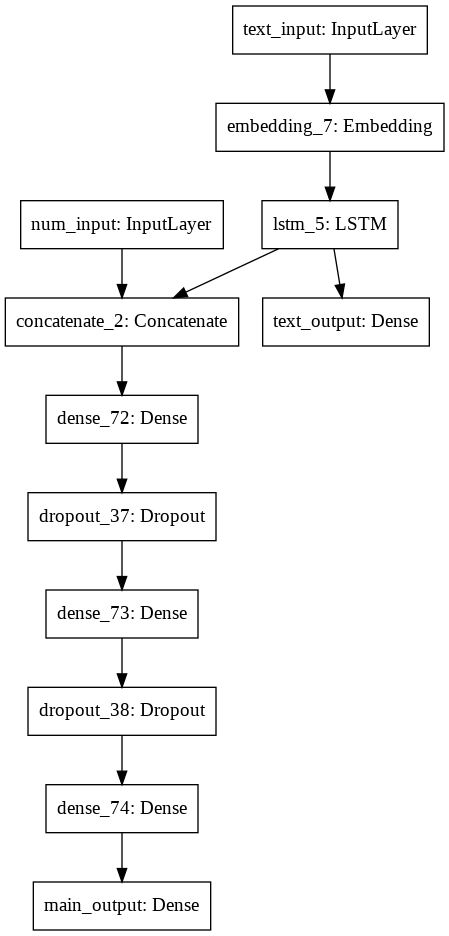

In [132]:
from keras.utils import plot_model
plot_model(nn2, to_file='model2.png')